# LAB 04: THE MULTI-LAYER PERCEPTRON

(1) Load the data into memory and save it to a pandas data frame. Do not normalize or one-hot encode any of the features until asked to do so later in the rubric. (2) Remove any observations that having missing data. (3) Encode any string data as integers for now. (4) You have the option of keeping the "county" variable or removing it. Be sure to discuss why you decided to keep/remove this variable. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'/Users/Mahsasheikhi/Desktop/CS 7324/labs/lab 4/acs2017_census_tract_data.csv')
df.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           74001 non-null  int64  
 1   State             74001 non-null  object 
 2   County            74001 non-null  object 
 3   TotalPop          74001 non-null  int64  
 4   Men               74001 non-null  int64  
 5   Women             74001 non-null  int64  
 6   Hispanic          73305 non-null  float64
 7   White             73305 non-null  float64
 8   Black             73305 non-null  float64
 9   Native            73305 non-null  float64
 10  Asian             73305 non-null  float64
 11  Pacific           73305 non-null  float64
 12  VotingAgeCitizen  74001 non-null  int64  
 13  Income            72885 non-null  float64
 14  IncomeErr         72885 non-null  float64
 15  IncomePerCap      73256 non-null  float64
 16  IncomePerCapErr   73256 non-null  float6

In [4]:
df = df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72718 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           72718 non-null  int64  
 1   State             72718 non-null  object 
 2   County            72718 non-null  object 
 3   TotalPop          72718 non-null  int64  
 4   Men               72718 non-null  int64  
 5   Women             72718 non-null  int64  
 6   Hispanic          72718 non-null  float64
 7   White             72718 non-null  float64
 8   Black             72718 non-null  float64
 9   Native            72718 non-null  float64
 10  Asian             72718 non-null  float64
 11  Pacific           72718 non-null  float64
 12  VotingAgeCitizen  72718 non-null  int64  
 13  Income            72718 non-null  float64
 14  IncomeErr         72718 non-null  float64
 15  IncomePerCap      72718 non-null  float64
 16  IncomePerCapErr   72718 non-null  float6

In [6]:
list = df.select_dtypes(include=['object']).columns.tolist()
print(list)

['State', 'County']


In [7]:
from sklearn import preprocessing

df2 = df.drop(['TractId'], axis = 1)

le = preprocessing.LabelEncoder()
df2.State = le.fit_transform(df.State)
df2.County = le.fit_transform(df.County) # keeping County 

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72718 entries, 0 to 74000
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             72718 non-null  int64  
 1   County            72718 non-null  int64  
 2   TotalPop          72718 non-null  int64  
 3   Men               72718 non-null  int64  
 4   Women             72718 non-null  int64  
 5   Hispanic          72718 non-null  float64
 6   White             72718 non-null  float64
 7   Black             72718 non-null  float64
 8   Native            72718 non-null  float64
 9   Asian             72718 non-null  float64
 10  Pacific           72718 non-null  float64
 11  VotingAgeCitizen  72718 non-null  int64  
 12  Income            72718 non-null  float64
 13  IncomeErr         72718 non-null  float64
 14  IncomePerCap      72718 non-null  float64
 15  IncomePerCapErr   72718 non-null  float64
 16  Poverty           72718 non-null  float6

We decided to keep the `County` variable in order to maintain the information that is given in the original dataset. While it will add some complexity to our models down the line, we feel it is important to utilize everything that can be learned about child poverty in order to better predict its occurence / class.

+ The next two requirements will need to be completed together as they might depend on one another:
  +  [**.5 points**] Balance the dataset so that about the same number of instances are within each class. Choose a method for balancing the dataset and explain your reasoning for selecting this method. One option is to choose quantization thresholds for the "ChildPoverty" variable that equally divide the data into four classes. Should balancing of the dataset be done for both the training and testing set? Explain.
  +  [**.5 points**] Assume you are equally interested in the classification performance for each class in the dataset. Split the dataset into 80% for training and 20% for testing. There is NO NEED to split the data multiple times for this lab.
+ Note: You will need to one hot encode the target, but do not one hot encode the categorical data until instructed to do so in the lab. 

In [9]:
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
#!pip install git+https://github.com/has2k1/plotnine.git
import plotnine as gg
from plotnine import ggplot, geom_point, aes, facet_wrap
import mizani
warnings.filterwarnings('ignore')

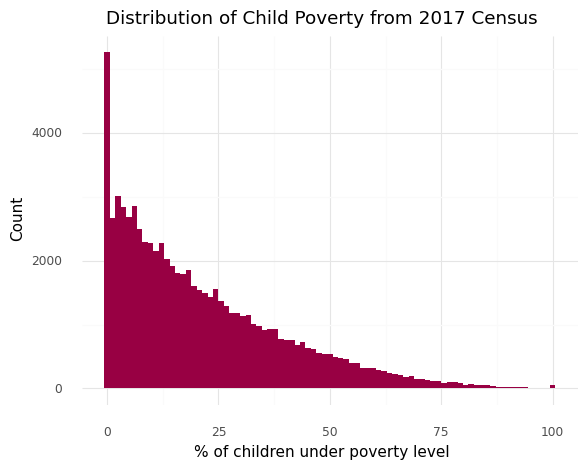

<ggplot: (8761455524346)>

In [75]:
ggplot(df2) + gg.geom_histogram(aes('ChildPoverty'), fill = '#980043') + gg.xlab('% of children under poverty level') + \
gg.ylab('Count') + gg.ggtitle('Distribution of Child Poverty from 2017 Census') + gg.theme_minimal()

Utilizing a non-data driven, and more domain savvy approach, the `ChildPoverty` variable is split into 4 categories:
+ 0% : **Category 0**, representing 0% of children under poverty level
+ 0% $<$ x $\le$ 17.4% : **Category 1**, representing those at or below the national children poverty level in 2017 [1]
+ 17.4% $<$ x $\le$ 50% : **Category 2**, representing those above the national poverty level, but below majority of children being under poverty level in 2017
+ $>$ 50% : **Category 3**, representing majority of children under poverty level

Given that these categories are not based on the data, the train/test split could be done before or after creating these classes as no leakage / data snooping is involved in the creation of these classes. The training set will need to be rebalanced so that the models are equally interested in all 4 classes, but the test set will be untouched until we are ready to fit final models and determine generalization performance on "new", unaltered data.  

In [11]:
df2['cpov_cat'] = pd.cut(df2.ChildPoverty, bins=[-1, 0, 17.4, 50, 100],labels=[0, 1, 2, 3])

In [12]:
print(df2.cpov_cat.value_counts())

1    33156
2    28183
3     6493
0     4886
Name: cpov_cat, dtype: int64


In [13]:
#df2[(df2['ChildPoverty'] == 0)][['ChildPoverty', 'cpov_cat']]

In [14]:
#df2.info()

In [15]:
from sklearn.model_selection import train_test_split

df3 = df2.drop('ChildPoverty', axis = 1)

train, test = train_test_split(df3, test_size = 0.2, random_state = 24)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58174 entries, 12966 to 905
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   State             58174 non-null  int64   
 1   County            58174 non-null  int64   
 2   TotalPop          58174 non-null  int64   
 3   Men               58174 non-null  int64   
 4   Women             58174 non-null  int64   
 5   Hispanic          58174 non-null  float64 
 6   White             58174 non-null  float64 
 7   Black             58174 non-null  float64 
 8   Native            58174 non-null  float64 
 9   Asian             58174 non-null  float64 
 10  Pacific           58174 non-null  float64 
 11  VotingAgeCitizen  58174 non-null  int64   
 12  Income            58174 non-null  float64 
 13  IncomeErr         58174 non-null  float64 
 14  IncomePerCap      58174 non-null  float64 
 15  IncomePerCapErr   58174 non-null  float64 
 16  Poverty           58

In [17]:
#!pip install imbalanced-learn
#!pip install imblearn
import imblearn
from imblearn.over_sampling import SMOTE


X_train = train.iloc[:, 0:35]
y_train = train.iloc[:, 35]

# upsampled all classes to majority class in training set
## SMOTE = Synthetic Minority Over-sampling Technique
sm = SMOTE(random_state = 24)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [18]:
X_test = test.iloc[:, 0:35]
y_test = test.iloc[:, 35]

In [19]:
print(y_train.value_counts())
print(y_res.value_counts())
print(X_res.shape)
print(y_res.shape)
print(X_test.shape)
print(y_test.shape)
#X_res.columns.to_list()

1    26496
2    22598
3     5190
0     3890
Name: cpov_cat, dtype: int64
0    26496
1    26496
2    26496
3    26496
Name: cpov_cat, dtype: int64
(105984, 35)
(105984,)
(14544, 35)
(14544,)


## Pre-processing and Initial Modeling (2.5 points total)

+ You will be using a two layer perceptron from class for the next few parts of the rubric. There are several versions of the two layer perceptron covered in class, with example code. When selecting an example two layer network from class be sure that you use: (1) vectorized gradient computation, (2) mini-batching, (3) cross entropy loss, and (4) proper Glorot initialization, at a minimum. There is no need to use momentum or learning rate reduction (assuming you choose a sufficiently small learning rate). It is recommended to use sigmoids throughout the network, but not required.


+ [**.5 points**] Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Do not normalize or one-hot encode the data (not yet). Be sure that training converges by graphing the loss function versus the number of epochs.


In [20]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [21]:
#Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
#Original Author: Sebastian Raschka

import numpy as np
from scipy.special import expit
import sys
import pandas as pd

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
# Start with the following functions:
#    init
#    encode_labels
#    initialize weights
#    sigmoid
#    add bias (vector of ones)
#    objective function (cost and regularizer)
class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_) # reshape to be W
        b1 = np.zeros((self.n_hidden, 1))
        
        W2_num_elems = (self.n_hidden)*self.n_output_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden)
        b2 = np.zeros((self.n_output_, 1))
        
        return W1, W2, b1, b2
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_) * np.sqrt(np.mean(W1 ** 2) + np.mean(W2 ** 2))
    
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    
    def _feedforward(self, X, W1, W2, b1, b2):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3
    
        
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2, self.b1, self.b2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred
    

In [22]:
params = dict(n_hidden=50, 
              C=0.1, # tradeoff L2 regularizer, pretty high
              epochs=400, # iterations
              eta=0.001,  # learning rate
              random_state=1)

In [23]:
# now let's add in the following functions:
#    feedforward
#    fit and predict
class TwoLayerPerceptron(TwoLayerPerceptronBase):
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # need to vectorize this computation!
        # See additional code and derivation below!
        pass

    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data."""
        
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.b1, self.b2 = self._initialize_weights()

        self.cost_ = []
        for i in range(self.epochs):

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            A1, Z1, A2, Z2, A3 = self._feedforward(X_data,self.W1,self.W2, self.b1, self.b2)
            
            cost = self._cost(A3,Y_enc,self.W1,self.W2)
            self.cost_.append(cost)

            # compute gradient via backpropagation
            gradW1, gradW2, gradb1, gradb2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, Y_enc=Y_enc,
                                              W1=self.W1, W2=self.W2)

            self.W1 -= self.eta * gradW1
            self.W2 -= self.eta * gradW2
            self.b1 -= self.eta * gradb1
            self.b2 -= self.eta * gradb2
            

        return self

In [24]:
class TwoLayerPerceptronVectorized(TwoLayerPerceptron):
    # just need a different gradient calculation
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = -2*(Y_enc-A3)*A3*(1-A3)
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb2 = np.sum(V2, axis=1).reshape(-1,1)
        gradb1 = np.sum(V1, axis=1).reshape(-1,1)
        
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C * 2
        gradW2 += W2 * self.l2_C * 2

        return gradW1, gradW2, gradb1, gradb2

In [25]:
# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka
# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
class TLPVectorizedMiniBatch(TwoLayerPerceptronVectorized):
    def __init__(self, alpha=0.1, decrease_const=0.0, shuffle=True, minibatches=1, **kwds):        
        # need to add to the original initializer 
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)
        
    def fit(self, X, y, print_progress=0):
        """ Learn weights from training data."""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.b1, self.b2 = self._initialize_weights()
        
        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape) # for momentum
        rho_W2_prev = np.zeros(self.W2.shape) # for momentum
        rho_b1_prev = np.zeros(self.b1.shape) # for momentum
        rho_b2_prev = np.zeros(self.b2.shape) # for momentum

        self.cost_ = []
        for k in range(self.epochs):

            # adaptive learning rate
            eta = self.eta**(1+self.decrease_const*k)# decreasing learning rate
            eta = max(eta,self.eta/1000)
            # there are many forms of adaptive learning rates out there!

            if print_progress>0 and (k+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (k+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                ridx = np.random.permutation(y_data.shape[0])
                X_data, Y_enc = X_data[ridx], Y_enc[:,ridx]

            # use numpy split to split into equal sized batches 
            # num batches== self.minibatches
            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2,
                                                       self.b1,
                                                       self.b2
                                                      )
                
                cost = self._cost(A3,Y_enc[:, idx],self.W1,self.W2)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradb1, gradb2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2,
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1, W2=self.W2)

                rho_W1, rho_W2 = eta * gradW1, eta * gradW2
                rho_b1, rho_b2 = eta * gradb1, eta * gradb2
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev)) # update with momentum
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev)) # update with momentum
                self.b1 -= (rho_b1 + (self.alpha * rho_b1_prev))
                self.b2 -= (rho_b2 + (self.alpha * rho_b2_prev))
                rho_W1_prev, rho_W2_prev = rho_W1, rho_W2
                rho_b1_prev, rho_b2_prev = rho_b1, rho_b2
                

            self.cost_.append(mini_cost)
            
        return self

In [26]:
# to implement the new style of objective function, 
# we just need to update the final layer calculation of the gradient
class TLPMiniBatchCrossEntropy(TLPVectorizedMiniBatch):
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A3)+(1-Y_enc)*np.log(1-A3))))
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = (A3-Y_enc) # <- this is only line that changed
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C

        return gradW1, gradW2, gradb1, gradb2

In [27]:
class TLPBetterInitial(TLPMiniBatchCrossEntropy):             
    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_))

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden)) 
        
        b1 = np.zeros((self.n_hidden, 1))
        b2 = np.zeros((self.n_output_, 1))
        
        return W1, W2, b1, b2

In [74]:
%%time
params['epochs'] = 100
params['eta'] = 0.1
nn_mini = TLPBetterInitial(**params,
                          alpha=0.1,# momentum calculation
                          decrease_const=0.1, # decreasing eta
                          minibatches=len(X_res)/32, # minibatch size (32 elements a piece)
                          shuffle=True)

    
nn_mini.fit(X_res.to_numpy(), y_res.to_numpy(), print_progress=50)
yhat1 = nn_mini.predict(X_test.to_numpy())
print('Test Accuracy:',accuracy_score(y_test.to_numpy(),yhat1))

Epoch: 100/100

Test Accuracy: 0.3840071507150715
CPU times: user 49.9 s, sys: 475 ms, total: 50.4 s
Wall time: 50 s


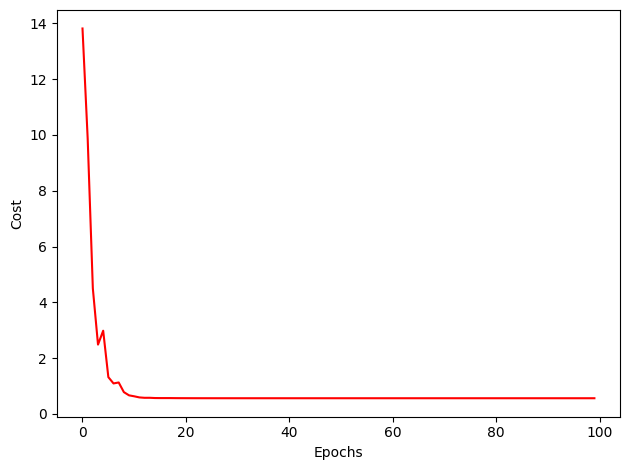

In [29]:
# take the mean of each minibatch epoch
cost_avgs = [np.mean(x) for x in nn_mini.cost_]

plt.plot(range(len(cost_avgs)), cost_avgs, color='red')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show() # converged in <20 epochs

### Normalization

+ [**.5 points**] Now (1) normalize the continuous numeric feature data. Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Be sure that training converges by graphing the loss function versus the number of epochs.  


In [30]:
from sklearn.preprocessing import StandardScaler

X_train2 = X_res.copy()
y_train2 = y_res.copy()

X_test2 = X_test.copy()
y_test2 = y_test.copy()

train_num = X_train2.drop(['State', 'County'], axis = 1)
num_cols = train_num.columns.to_list()

X_train2[num_cols] = StandardScaler().fit_transform(X_train2[num_cols])
X_test2[num_cols] = StandardScaler().fit_transform(X_test2[num_cols])

In [73]:
%%time
params['epochs'] = 100
params['eta'] = 0.1
nn_mini2 = TLPBetterInitial(**params,
                          alpha=0.1,# momentum calculation
                          decrease_const=0.1, # decreasing eta
                          minibatches=len(X_train2)/32, # minibatch size (32 elements a piece)
                          shuffle=True)

nn_mini2.fit(X_train2.to_numpy(), y_train2.to_numpy(), print_progress=50)
yhat2 = nn_mini2.predict(X_test2.to_numpy())
print('Test Accuracy:',accuracy_score(y_test2.to_numpy(),yhat2))

Epoch: 100/100

Test Accuracy: 0.10004125412541254
CPU times: user 50.4 s, sys: 416 ms, total: 50.8 s
Wall time: 51.1 s


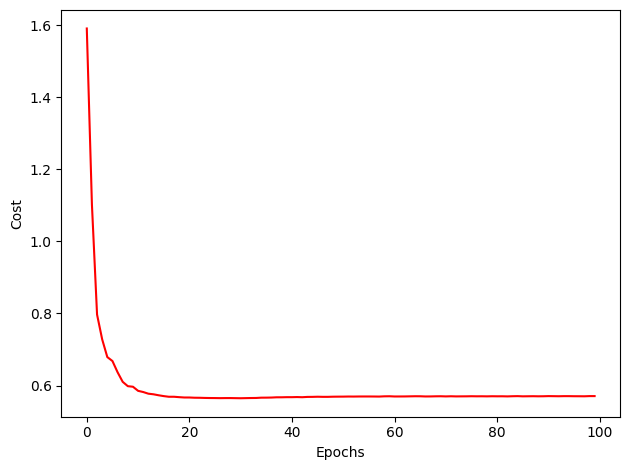

In [32]:
# take the mean of each minibatch epoch
cost_avgs = [np.mean(x) for x in nn_mini2.cost_]

plt.plot(range(len(cost_avgs)), cost_avgs, color='red')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show() # converged in <20 epochs

### One hot encoding and normalization

+ [**.5 points**] Now(1) normalize the continuous numeric feature data AND (2) one hot encode the categorical data. Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Be sure that training converges by graphing the loss function versus the number of epochs. 



In [33]:
from sklearn.preprocessing import OneHotEncoder

In [34]:
X_train3 = X_train2.copy()
y_train4 = y_train2.copy()

X_test3 = X_test2.copy()
y_test4 = y_test2.copy()

#print(len(X_train3.State.unique()) + len(X_train3.County.unique()))
#print(len(X_test2.State.unique()) + len(X_test3.County.unique()))
#print(X_train3.State.unique())
#print(X_train3.County.unique())

enc = OneHotEncoder(sparse = False)
enc.fit_transform(X_train3[['State', 'County']])#.shape
colnames = enc.get_feature_names_out(['State', 'County']).tolist()

X_train3[colnames] = enc.fit_transform(X_train3[['State', 'County']])
X_train4 = X_train3.drop(['State', 'County'], axis = 1)
X_train4

enc.fit_transform(X_test3[['State', 'County']])#.shape
colnames2 = enc.get_feature_names_out(['State', 'County']).tolist()
X_test3[colnames2] = enc.fit_transform(X_test3[['State', 'County']])
X_test4 = X_test3.drop(['State', 'County'], axis = 1)

s = set(colnames2)
temp3 = [x for x in colnames if x not in s]
#print(len(temp3))
X_test4[temp3] = 0.0

In [35]:
print(X_train4.shape)
print(X_test4.shape)
print(y_train4.shape)
print(y_test4.shape)

(105984, 2039)
(14544, 2039)
(105984,)
(14544,)


In [72]:
%%time
params['epochs'] = 100
params['eta'] = 0.1
nn_mini3 = TLPBetterInitial(**params,
                          alpha=0.1,# momentum calculation
                          decrease_const=0.1, # decreasing eta
                          minibatches=len(X_train4)/32, # minibatch size (32 elements a piece)
                          shuffle=True)

    
nn_mini3.fit(X_train4.to_numpy(), y_train4.to_numpy(), print_progress=50)
yhat3 = nn_mini3.predict(X_test4.to_numpy())
print('Test Accuracy:',accuracy_score(y_test4.to_numpy(),yhat3))

Epoch: 100/100

Test Accuracy: 0.6015539053905391
CPU times: user 18min 34s, sys: 3min 38s, total: 22min 13s
Wall time: 6min 17s


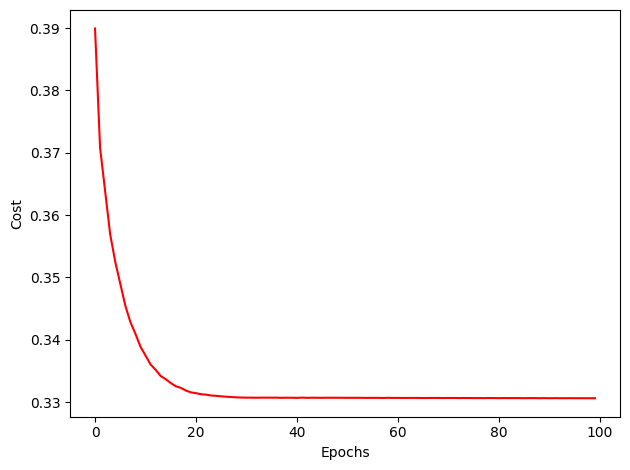

In [37]:
# take the mean of each minibatch epoch
cost_avgs = [np.mean(x) for x in nn_mini3.cost_]

plt.plot(range(len(cost_avgs)), cost_avgs, color='red')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show() # converged in <20 epochs

In [38]:
#print(np.unique(yhat1))
#print(np.unique(yhat2))
#print(np.unique(yhat3))
#print(np.unique(y_test))
#print(np.unique(y_test2))
#print(np.unique(y_test4))
len(y_test[y_test == 2])/len(yhat1)

0.3840071507150715

### Comparison of models

+ [**1 points**] Compare the performance of the three models you just trained. Are there any meaningful differences in performance? Explain, in your own words, why these models have (or do not have) different performances.  
  + *Use one-hot encoding and normalization on the dataset for the remainder of this lab assignment.*

**Model 1 Accuracy:** 38.40%
+ This model is 38.4% accurate based on guessing the majority class (2) for every observation. This model just says all observations are above the national average, but below majority of children being in poverty, which is correct 38.4% of the time for the test set. 
 
**Model 2 Accuracy:** 10.00%
+ This model does not learn well because the categorical variables are being fed in as non-normalized numeric variables, which means the model is probably utilizing these variables more in its prediction because the variation between observations is much greater than what it sees in the normalized numeric columns. Predicting based on state and county does not yield a good, or accurate, model. 
 
**Model 3 Accuracy:** 60.16%
+ This is the best model thus far. It predicts all 4 categories, which is a step up from the first model, and gets the child poverty class correct 60.16% of the time. This is a meaningful difference from the first two models. Normalizing the numeric columns and one hot encoding the categorical variables gives the model the best chance at an unbiased (or less biased) approach to the classification task. 

In [39]:
acc1 = accuracy_score(y_test.to_numpy(),yhat1)
acc2 = accuracy_score(y_test2.to_numpy(),yhat2)
acc3 = accuracy_score(y_test4.to_numpy(),yhat3)

e1 = 1 - acc1
e2 = 1 - acc2
e3 = 1 - acc3

z_stat = 1.96 #95% CI

# e1 and e2
d12 = e1 - e2
var12 = (e1*(1 - e1) + e2*(1 - e2))/len(y_test)
print('Model 1 vs. Model 2 CI:', d12 - z_stat*np.sqrt(var12), d12 + z_stat*np.sqrt(var12))

# e1 and e3
d13 = e1 - e3
var13 = (e1*(1 - e1) + e3*(1 - e3))/len(y_test2)
print('Model 1 vs. Model 3 CI:', d13 - z_stat*np.sqrt(var13), d13 + z_stat*np.sqrt(var13))

# e2 and e3
d23 = e2 - e3
var23 = (e2*(1 - e2) + e3*(1 - e3))/len(y_test4)
print('Model 2 vs. Model 3 CI:', d23 - z_stat*np.sqrt(var23), d23 + z_stat*np.sqrt(var23))

Model 1 vs. Model 2 CI: -0.2932535936217415 -0.27467819955757644
Model 1 vs. Model 3 CI: 0.20633112562966183 0.22876238372127333
Model 2 vs. Model 3 CI: 0.4921803949979359 0.5108449075323171


Approximating the evaluation criterion (accuracy) as a binomial distibution and bounding by the variance, we get the 95% confidence intervals above. From this we see that Model 3 is better (more accurate) than Models 1 and 2, while Model 1 is better than Model 2 as well.

## Modeling
+ [**1 points**] Add support for a third layer in the multi-layer perceptron. Add support for saving (and plotting after training is completed) the average magnitude of the gradient for each layer, for each epoch (like we did in the flipped module for back propagation). For magnitude calculation, you are free to use either the average absolute values or the L1/L2 norm.
  + Quantify the performance of the model and graph the magnitudes for each layer versus the number of epochs.

### Adding support for a third layer

In [40]:
# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka

# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
import numpy as np
from scipy.special import expit
import pandas as pd
import sys

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class ThreeLayerPerceptron(object):
    def __init__(self, n_hidden=30,alpha=0.0,decrease_const=0.0,shuffle=True, minibatches=1,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_))
        b1 = np.zeros((self.n_hidden, 1))
        
        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_hidden + self.n_hidden))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_hidden)) 
        b2 = np.zeros((self.n_hidden, 1))
        
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden))
        W3 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden)) 
        b3 = np.zeros((self.n_output_, 1))
        
        
        return W1, W2, W3, b1, b2, b3
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_) * np.sqrt(np.mean(W1** 2) + np.mean(W2 ** 2) + np.mean(W3 ** 2))
    
    def _cost(self,A4,Y_enc,W1,W2,W3):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A4)+(1-Y_enc)*np.log(1-A4))))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3)
        return cost + L2_term
    
    
    def _feedforward(self, X, W1, W2, W3, b1, b2, b3):
        """Compute feedforward step
        """
        A1 = X.T
        Z1 = W1 @ A1 + b1
        
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        
        
        A3 = self._sigmoid(Z2)
        Z3 = W3 @ A3 + b3
        
        A4 = self._sigmoid(Z3)
        return A1, Z1, A2, Z2, A3, Z3, A4
    
    def _get_gradient(self, A1, A2, A3,A4, Z1, Z2,Z3, Y_enc, W1, W2,W3):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V3 = (A4-Y_enc)
        V2 = A3*(1-A3)*(W3.T @ V3)
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        grad3 = V3@ A3.T
        grad2 = V2@ A2.T
        grad1 = V1@ A1.T
        
        gradb3 = np.sum(V3, axis=1).reshape((-1,1))
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        # regularize weights that are not bias terms
        grad1 += W1 * self.l2_C
        grad2 += W2* self.l2_C
        grad3 += W3* self.l2_C
        
        return grad1, grad2, grad3, gradb1, gradb2,gradb3
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, A4 = self._feedforward(X, self.W1, self.W2, self.W3, self.b1, self.b2, self.b3)
        y_pred = np.argmax(A4, axis=0)
        return y_pred
    
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3 , self.b1, self.b2, self.b3 = self._initialize_weights()

        rho_W1_prev = np.zeros(self.W1.shape)
        rho_W2_prev = np.zeros(self.W2.shape)
        rho_W3_prev = np.zeros(self.W3.shape)
        rho_b1_prev = np.zeros(self.b1.shape)
        rho_b2_prev = np.zeros(self.b2.shape)
        rho_b3_prev = np.zeros(self.b3.shape)

        self.grad_w1_ = np.zeros(self.epochs)
        self.grad_w2_ = np.zeros(self.epochs)
        self.grad_w3_ = np.zeros(self.epochs)
        self.grad_b1_ = np.zeros(self.epochs)
        self.grad_b2_ = np.zeros(self.epochs)
        self.grad_b3_ = np.zeros(self.epochs)
    
        self.cost_ = []
            
        for i in range(self.epochs):

            # adaptive learning rate
            # \frac{\eta}{1+\epsilon\cdot k}
            eta = self.eta ** (1 + self.decrease_const*i)
            eta = max(eta, self.eta/1000)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                ridx = np.random.permutation(y_data.shape[0])
                X_data, Y_enc = X_data[ridx], Y_enc[:,ridx]
                
            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2,
                                                       self.W3,
                                                       self.b1,
                                                       self.b2,
                                                       self.b3
                                                              )
                
                cost = self._cost(A4,Y_enc[:, idx],self.W1,self.W2,self.W3)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2, grad3,gradb1,gradb2,gradb3 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, Z1=Z1, Z2=Z2, Z3=Z3,
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1,W2=self.W2,W3=self.W3)

                # momentum calculations
                rho_W1, rho_W2, rho_W3 = eta * grad1, eta * grad2, eta * grad3
                rho_b1, rho_b2, rho_b3 = eta * gradb1, eta * gradb2, eta * gradb3
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev))
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev))
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev))
                self.b1 -= (rho_b1 + (self.alpha * rho_b1_prev))
                self.b2 -= (rho_b2 + (self.alpha * rho_b2_prev))
                self.b3 -= (rho_b3 + (self.alpha * rho_b3_prev))
                rho_W1_prev, rho_W2_prev, rho_W3_prev = rho_W1, rho_W2, rho_W3
                rho_b1_prev, rho_b2_prev,rho_b3_prev = rho_b1, rho_b2, rho_b3
                
            self.cost_.append(mini_cost)

            self.grad_w1_[i] = np.mean(np.abs(grad1))
            self.grad_w2_[i] = np.mean(np.abs(grad2))
            self.grad_w3_[i] = np.mean(np.abs(grad3))
            self.grad_b1_[i]=np.mean(np.abs(gradb1))
            self.grad_b2_[i]=np.mean(np.abs(gradb2))
            self.grad_b3_[i]=np.mean(np.abs(gradb3))
        
        return self

In [41]:
vals = { 'n_hidden':50, 
         'C':0.1, 'epochs':70, 'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}

nn_better3 = ThreeLayerPerceptron(**vals)

nn_better3.fit(X_train4.to_numpy(), y_train4.to_numpy(), print_progress=1)

Epoch: 70/70

In [66]:
yhatM3 = nn_better3.predict(X_test4.to_numpy())
print('Test Accuracy:',accuracy_score(y_test4.to_numpy(),yhatM3))

Test Accuracy: 0.6157178217821783


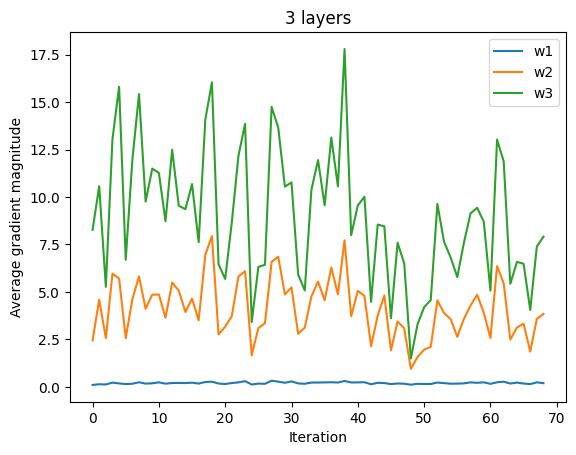

In [43]:
ax = plt.subplot(1,1,1)
plt.plot(abs(nn_better3.grad_w1_[1:]), label='w1')
plt.plot(abs(nn_better3.grad_w2_[1:]), label='w2')
plt.plot(abs(nn_better3.grad_w3_[1:]), label='w3')
plt.legend()
plt.ylabel('Average gradient magnitude')
plt.xlabel('Iteration')
plt.title('3 layers')
plt.show()

### Adding support for a fourth layer

+ [**1 points**] Repeat the previous step, adding support for a fourth layer.

In [44]:
# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka

# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
import numpy as np
from scipy.special import expit
import pandas as pd
import sys

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class FourLayerPerceptron(object):
    def __init__(self, n_hidden=30,alpha=0.0,decrease_const=0.0,shuffle=True, minibatches=1,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot
    
    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_ ))
        b1 = np.zeros((self.n_hidden, 1))
        
        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_hidden + self.n_hidden))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_hidden)) 
        b2 = np.zeros((self.n_hidden, 1))
        
        init_bound = 4*np.sqrt(6 / (self.n_hidden + self.n_hidden))
        W3 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_hidden)) 
        b3 = np.zeros((self.n_hidden, 1))
        
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden))
        W4 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden)) 
        b4 = np.zeros((self.n_output_, 1))
        
        
        return W1, W2, W3, W4, b1, b2, b3, b4

    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3, W4):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_) * np.sqrt(np.mean(W1 ** 2) + np.mean(W2 ** 2) + np.mean(W3 ** 2) +
                                       np.mean(W4 ** 2))
    
    def _cost(self,A5,Y_enc,W1,W2,W3,W4):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A5)+(1-Y_enc)*np.log(1-A5))))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4)
        return cost + L2_term


    def _feedforward(self, X, W1, W2, W3, W4, b1, b2, b3, b4):
        """Compute feedforward step
        """
        A1 = X.T
        Z1 = W1 @ A1 + b1
        
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        
        
        A3 = self._sigmoid(Z2)
        Z3 = W3 @ A3 + b3
        
        A4 = self._sigmoid(Z3)
        Z4 = W4 @ A4 + b4
        
        A5 = self._sigmoid(Z4)
        
        
        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5

    
    def _get_gradient(self, A1, A2, A3, A4, A5, Z1, Z2, Z3, Z4, Y_enc, W1, W2, W3, W4):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V4 = (A5-Y_enc)
        V3 = A4*(1-A4)*(W4.T @ V4)
        V2 = A3*(1-A3)*(W3.T @ V3) 
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        grad4 = V4 @ A4.T
        grad3 = V3 @ A3.T
        grad2 = V2 @ A2.T
        grad1 = V1 @ A1.T
        
        gradb4 = np.sum(V4, axis=1).reshape((-1,1))
        gradb3 = np.sum(V3, axis=1).reshape((-1,1))
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        # regularize weights that are not bias terms
        grad1 += W1 * self.l2_C
        grad2 += W2 * self.l2_C
        grad3 += W3 * self.l2_C
        grad4 += W4 * self.l2_C
        
        return grad1, grad2, grad3, grad4, gradb1, gradb2, gradb3, gradb4
    
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, _, _, A5 = self._feedforward(X, self.W1, self.W2, self.W3, self.W4, self.b1, self.b2, self.b3, self.b4)
        y_pred = np.argmax(A5, axis=0)
        return y_pred
    

    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4 , self.b1, self.b2, self.b3, self.b4 = self._initialize_weights()

        rho_W1_prev = np.zeros(self.W1.shape)
        rho_W2_prev = np.zeros(self.W2.shape)
        rho_W3_prev = np.zeros(self.W3.shape)
        rho_W4_prev = np.zeros(self.W4.shape)
        rho_b1_prev = np.zeros(self.b1.shape)
        rho_b2_prev = np.zeros(self.b2.shape)
        rho_b3_prev = np.zeros(self.b3.shape)
        rho_b4_prev = np.zeros(self.b4.shape)

        self.grad_w1_ = np.zeros(self.epochs)
        self.grad_w2_ = np.zeros(self.epochs)
        self.grad_w3_ = np.zeros(self.epochs)
        self.grad_w4_ = np.zeros(self.epochs)
        self.grad_b1_ = np.zeros(self.epochs)
        self.grad_b2_ = np.zeros(self.epochs)
        self.grad_b3_ = np.zeros(self.epochs)
        self.grad_b4_ = np.zeros(self.epochs)
        self.cost_ = []
            
        for i in range(self.epochs):

            # adaptive learning rate
            # \frac{\eta}{1+\epsilon\cdot k}
            eta = self.eta ** (1 + self.decrease_const*i)
            eta = max(eta, self.eta/1000)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                ridx = np.random.permutation(y_data.shape[0])
                X_data, Y_enc = X_data[ridx], Y_enc[:,ridx]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2,
                                                       self.W3,
                                                       self.W4,
                                                       self.b1,
                                                       self.b2,
                                                       self.b3,
                                                       self.b4
                                                              )
                
                cost = self._cost(A5,Y_enc[:, idx],self.W1,self.W2,self.W3,self.W4)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2, grad3, grad4, gradb1, gradb2, gradb3, gradb4 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, A5=A5, Z1=Z1, Z2=Z2, Z3=Z3, Z4=Z4,
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1, W2=self.W2, W3=self.W3, W4=self.W4)

                # momentum calculations
                rho_W1, rho_W2, rho_W3, rho_W4 = eta * grad1, eta * grad2, eta * grad3, eta * grad4
                rho_b1, rho_b2, rho_b3, rho_b4 = eta * gradb1, eta * gradb2, eta * gradb3, eta * gradb4
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev))
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev))
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev))
                self.W4 -= (rho_W4 + (self.alpha * rho_W4_prev))
                self.b1 -= (rho_b1 + (self.alpha * rho_b1_prev))
                self.b2 -= (rho_b2 + (self.alpha * rho_b2_prev))
                self.b3 -= (rho_b3 + (self.alpha * rho_b3_prev))
                self.b4 -= (rho_b4 + (self.alpha * rho_b4_prev))
                rho_W1_prev, rho_W2_prev, rho_W3_prev , rho_W4_prev = rho_W1, rho_W2, rho_W3, rho_W4
                rho_b1_prev, rho_b2_prev,rho_b3_prev,rho_b4_prev = rho_b1, rho_b2, rho_b3, rho_b4
                
            self.cost_.append(mini_cost)

            self.grad_w1_[i] = np.mean(np.abs(grad1))
            self.grad_w2_[i] = np.mean(np.abs(grad2))
            self.grad_w3_[i] = np.mean(np.abs(grad3))
            self.grad_w4_[i] = np.mean(np.abs(grad4))
            self.grad_b1_[i]=np.mean(np.abs(gradb1))
            self.grad_b2_[i]=np.mean(np.abs(gradb2))
            self.grad_b3_[i]=np.mean(np.abs(gradb3))
            self.grad_b4_[i]=np.mean(np.abs(gradb4))
        
        return self

In [45]:
vals = { 'n_hidden':50, 
         'C':0.1, 'epochs':70, 'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}

nn_better4 = FourLayerPerceptron(**vals)


nn_better4.fit(X_train4.to_numpy(), y_train4.to_numpy(), print_progress=1)

Epoch: 70/70

In [68]:
yhatM4 = nn_better4.predict(X_test4.to_numpy())
print('Test Accuracy:',accuracy_score(y_test4.to_numpy(),yhatM4))

Test Accuracy: 0.6328382838283828


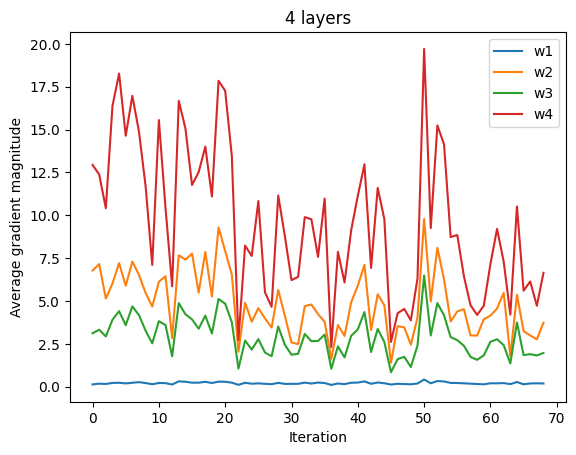

In [47]:
ax = plt.subplot(1,1,1)
plt.plot(abs(nn_better4.grad_w1_[1:]), label='w1')
plt.plot(abs(nn_better4.grad_w2_[1:]), label='w2')
plt.plot(abs(nn_better4.grad_w3_[1:]), label='w3')
plt.plot(abs(nn_better4.grad_w4_[1:]), label='w4')
plt.legend()
plt.ylabel('Average gradient magnitude')
plt.xlabel('Iteration')
plt.title('4 layers')
plt.show()

### Adding support for a fifth layer
+ [**1 points**] Repeat the previous step, adding support for a fifth layer. 

In [48]:
# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka

# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
import numpy as np
from scipy.special import expit
import pandas as pd
import sys

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class FiveLayerPerceptron(object):
    def __init__(self, n_hidden=30,alpha=0.0,decrease_const=0.0,shuffle=True, minibatches=1,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot
    
    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_ ))
        b1 = np.zeros((self.n_hidden, 1))
        
        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_hidden + self.n_hidden))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_hidden)) 
        b2 = np.zeros((self.n_hidden, 1))
        
        init_bound = 4*np.sqrt(6 / (self.n_hidden + self.n_hidden))
        W3 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_hidden)) 
        b3 = np.zeros((self.n_hidden, 1))
        
        init_bound = 4*np.sqrt(6 / (self.n_hidden + self.n_hidden))
        W4 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_hidden)) 
        b4 = np.zeros((self.n_hidden, 1))
        
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden))
        W5 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden)) 
        b5 = np.zeros((self.n_output_, 1))
        
        
        return W1, W2, W3, W4, W5, b1, b2, b3, b4, b5

    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3, W4, W5):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_) * np.sqrt(np.mean(W1 ** 2) + np.mean(W2 ** 2) + np.mean(W3 ** 2) +
                                       np.mean(W4 ** 2) + np.mean(W5 ** 2))
    
    def _cost(self,A6,Y_enc,W1,W2,W3,W4,W5):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A6)+(1-Y_enc)*np.log(1-A6))))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4, W5)
        return cost + L2_term

    def _feedforward(self, X, W1, W2, W3, W4, W5, b1, b2, b3, b4, b5):
        """Compute feedforward step
        """
        A1 = X.T
        Z1 = W1 @ A1 + b1
        
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        
        
        A3 = self._sigmoid(Z2)
        Z3 = W3 @ A3 + b3
        
        A4 = self._sigmoid(Z3)
        Z4 = W4 @ A4 + b4
        
        A5 = self._sigmoid(Z4)
        Z5 = W5 @ A5 + b5
        
        A6 = self._sigmoid(Z5)
        
        
        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6


    def _get_gradient(self, A1, A2, A3, A4, A5, A6, Z1, Z2, Z3, Z4, Z5, Y_enc, W1, W2, W3, W4, W5):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V5 = (A6-Y_enc)
        V4 = A5*(1-A5)*(W5.T @ V5)
        V3 = A4*(1-A4)*(W4.T @ V4)
        V2 = A3*(1-A3)*(W3.T @ V3)
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        grad5 = V5 @ A5.T
        grad4 = V4 @ A4.T
        grad3 = V3 @ A3.T
        grad2 = V2 @ A2.T
        grad1 = V1 @ A1.T
        
        gradb5 = np.sum(V5, axis=1).reshape((-1,1))
        gradb4 = np.sum(V4, axis=1).reshape((-1,1))
        gradb3 = np.sum(V3, axis=1).reshape((-1,1))
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        # regularize weights that are not bias terms
        grad1 += W1 * self.l2_C
        grad2 += W2 * self.l2_C
        grad3 += W3 * self.l2_C
        grad4 += W4 * self.l2_C
        grad5 += W5 * self.l2_C
        
        return grad1, grad2, grad3, grad4, grad5, gradb1, gradb2, gradb3, gradb4, gradb5

    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, _, _, _, _, A6 = self._feedforward(X, self.W1, self.W2, self.W3, self.W4, self.W5, self.b1, self.b2, self.b3, self.b4, self.b5)
        y_pred = np.argmax(A6, axis=0)
        return y_pred
    

    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4, self.W5 , self.b1, self.b2, self.b3, self.b4, self.b5 = self._initialize_weights()

        rho_W1_prev = np.zeros(self.W1.shape)
        rho_W2_prev = np.zeros(self.W2.shape)
        rho_W3_prev = np.zeros(self.W3.shape)
        rho_W4_prev = np.zeros(self.W4.shape)
        rho_W5_prev = np.zeros(self.W5.shape)
        rho_b1_prev = np.zeros(self.b1.shape)
        rho_b2_prev = np.zeros(self.b2.shape)
        rho_b3_prev = np.zeros(self.b3.shape)
        rho_b4_prev = np.zeros(self.b4.shape)
        rho_b5_prev = np.zeros(self.b5.shape)

        self.grad_w1_ = np.zeros(self.epochs)
        self.grad_w2_ = np.zeros(self.epochs)
        self.grad_w3_ = np.zeros(self.epochs)
        self.grad_w4_ = np.zeros(self.epochs)
        self.grad_w5_ = np.zeros(self.epochs)
        self.grad_b1_ = np.zeros(self.epochs)
        self.grad_b2_ = np.zeros(self.epochs)
        self.grad_b3_ = np.zeros(self.epochs)
        self.grad_b4_ = np.zeros(self.epochs)
        self.grad_b5_ = np.zeros(self.epochs)
        self.cost_ = []

        for i in range(self.epochs):

            # adaptive learning rate
            # \frac{\eta}{1+\epsilon\cdot k}
            eta = self.eta ** (1 + self.decrease_const*i)
            eta = max(eta, self.eta/1000)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                ridx = np.random.permutation(y_data.shape[0])
                X_data, Y_enc = X_data[ridx], Y_enc[:,ridx]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2,
                                                       self.W3,
                                                       self.W4,
                                                       self.W5,
                                                       self.b1,
                                                       self.b2,
                                                       self.b3,
                                                       self.b4,
                                                       self.b5
                                                              )
                
                cost = self._cost(A6,Y_enc[:, idx],self.W1,self.W2,self.W3,self.W4,self.W5)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2, grad3, grad4, grad5, gradb1, gradb2, gradb3, gradb4, gradb5 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4,A5=A5,A6=A6, Z1=Z1, Z2=Z2, Z3=Z3,Z4=Z4,Z5=Z5,
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1,W2=self.W2,W3=self.W3,W4=self.W4,W5=self.W5)

                # momentum calculations
                rho_W1, rho_W2, rho_W3, rho_W4, rho_W5 = eta * grad1, eta * grad2, eta * grad3, eta * grad4, eta * grad5
                rho_b1, rho_b2, rho_b3, rho_b4, rho_b5 = eta * gradb1, eta * gradb2, eta * gradb3, eta * gradb4, eta * gradb5
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev))
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev))
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev))
                self.W4 -= (rho_W4 + (self.alpha * rho_W4_prev))
                self.W5 -= (rho_W5 + (self.alpha * rho_W5_prev))
                self.b1 -= (rho_b1 + (self.alpha * rho_b1_prev))
                self.b2 -= (rho_b2 + (self.alpha * rho_b2_prev))
                self.b3 -= (rho_b3 + (self.alpha * rho_b3_prev))
                self.b4 -= (rho_b4 + (self.alpha * rho_b4_prev))
                self.b5 -= (rho_b5 + (self.alpha * rho_b5_prev))
                rho_W1_prev, rho_W2_prev, rho_W3_prev , rho_W4_prev, rho_W5_prev = rho_W1, rho_W2, rho_W3, rho_W4, rho_W5
                rho_b1_prev, rho_b2_prev,rho_b3_prev,rho_b4_prev,rho_b5_prev = rho_b1, rho_b2, rho_b3, rho_b4, rho_b5
                
            self.cost_.append(mini_cost)

            self.grad_w1_[i] = np.mean(np.abs(grad1))
            self.grad_w2_[i] = np.mean(np.abs(grad2))
            self.grad_w3_[i] = np.mean(np.abs(grad3))
            self.grad_w4_[i] = np.mean(np.abs(grad4))
            self.grad_w5_[i] = np.mean(np.abs(grad5))
            self.grad_b1_[i]=np.mean(np.abs(gradb1))
            self.grad_b2_[i]=np.mean(np.abs(gradb2))
            self.grad_b3_[i]=np.mean(np.abs(gradb3))
            self.grad_b4_[i]=np.mean(np.abs(gradb4))
            self.grad_b5_[i]=np.mean(np.abs(gradb5))
        
        return self


In [49]:
vals = { 'n_hidden':50, 
         'C':0.1, 'epochs':70, 'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}

nn_better5 = FiveLayerPerceptron(**vals)

nn_better5.fit(X_train4.to_numpy(), y_train4.to_numpy(), print_progress=1)

Epoch: 70/70

In [69]:
yhatM5 = nn_better5.predict(X_test4.to_numpy())
print('Test Accuracy:',accuracy_score(y_test4.to_numpy(),yhatM5))

Test Accuracy: 0.5675192519251925


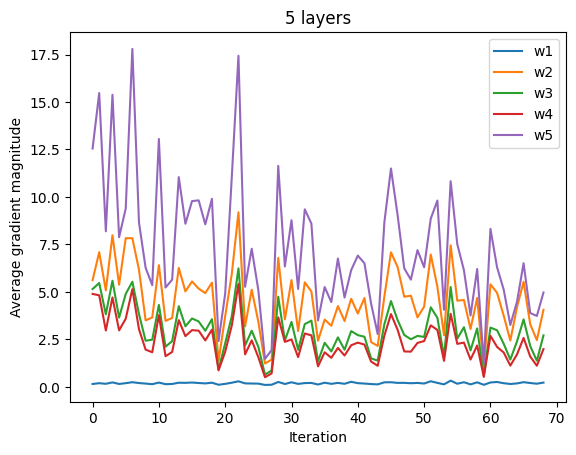

In [51]:
ax = plt.subplot(1,1,1)
plt.plot(abs(nn_better5.grad_w1_[1:]), label='w1')
plt.plot(abs(nn_better5.grad_w2_[1:]), label='w2')
plt.plot(abs(nn_better5.grad_w3_[1:]), label='w3')
plt.plot(abs(nn_better5.grad_w4_[1:]), label='w4')
plt.plot(abs(nn_better5.grad_w5_[1:]), label='w5')
plt.legend()
plt.ylabel('Average gradient magnitude')
plt.xlabel('Iteration')
plt.title('5 layers')
plt.show()

### Implementing an adaptive learning technique and Comparing
+ [**2 points**] Implement an adaptive learning technique that was discussed in lecture and use it on the five layer network (such as AdaGrad, RMSProps, or AdaDelta). Discuss which adaptive method you chose. Compare the performance of your five layer model with and without the adaptive learning strategy. Do not use AdaM for the adaptive learning technique as it is part of the exceptional work.

Since we have been utilizing an adaptive learning technique in the previous sections, we are first fitting a Five Layer Perceptron with no adaptive learning for reference. Next, we change the adaptive learning technique to reflect that of AdaDelta. We chose this because we thought it would lead nicely into the AdaM adaptive learning technique for the next section. 

In [52]:
class FiveLPNoAdaptive(FiveLayerPerceptron):
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4, self.W5 , self.b1, self.b2, self.b3, self.b4, self.b5 = self._initialize_weights()

        self.grad_w1_ = np.zeros(self.epochs)
        self.grad_w2_ = np.zeros(self.epochs)
        self.grad_w3_ = np.zeros(self.epochs)
        self.grad_w4_ = np.zeros(self.epochs)
        self.grad_w5_ = np.zeros(self.epochs)
        self.grad_b1_ = np.zeros(self.epochs)
        self.grad_b2_ = np.zeros(self.epochs)
        self.grad_b3_ = np.zeros(self.epochs)
        self.grad_b4_ = np.zeros(self.epochs)
        self.grad_b5_ = np.zeros(self.epochs)
        self.cost_ = []

       
            
        for i in range(self.epochs):

            # adaptive learning rate
            # \frac{\eta}{1+\epsilon\cdot k}
            eta = self.eta ** (1 + self.decrease_const*i)
            eta = max(eta, self.eta/1000)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                ridx = np.random.permutation(y_data.shape[0])
                X_data, Y_enc = X_data[ridx], Y_enc[:,ridx]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4,Z4,A5,Z5,A6 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2,
                                                       self.W3,
                                                       self.W4,
                                                       self.W5,
                                                       self.b1,
                                                       self.b2,
                                                       self.b3,
                                                       self.b4,
                                                       self.b5
                                                              )
                
                cost = self._cost(A6,Y_enc[:, idx],self.W1,self.W2,self.W3,self.W4,self.W5)
                mini_cost.append(cost) # this appends cost of mini-batch only

             # compute gradient via backpropagation
                grad1, grad2, grad3, grad4, grad5, gradb1, gradb2, gradb3, gradb4, gradb5 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4,A5=A5,A6=A6, Z1=Z1, Z2=Z2, Z3=Z3,Z4=Z4,Z5=Z5,
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1,W2=self.W2,W3=self.W3,W4=self.W4,W5=self.W5)

                self.W1 -= self.eta * grad1
                self.W2 -= self.eta * grad2
                self.W3 -= self.eta * grad3
                self.W4 -= self.eta * grad4
                self.W5 -= self.eta * grad5
                
                self.b1 -= self.eta * gradb1
                self.b2 -= self.eta * gradb2
                self.b3 -= self.eta * gradb3
                self.b4 -= self.eta * gradb4
                self.b5 -= self.eta * gradb5
            
            self.cost_.append(mini_cost)
                
            self.grad_w1_[i] = np.mean(np.abs(grad1))
            self.grad_w2_[i] = np.mean(np.abs(grad2))
            self.grad_w3_[i] = np.mean(np.abs(grad3))
            self.grad_w4_[i] = np.mean(np.abs(grad4))
            self.grad_w5_[i] = np.mean(np.abs(grad5))
            self.grad_b1_[i]=np.mean(np.abs(gradb1))
            self.grad_b2_[i]=np.mean(np.abs(gradb2))
            self.grad_b3_[i]=np.mean(np.abs(gradb3))
            self.grad_b4_[i]=np.mean(np.abs(gradb4))
            self.grad_b5_[i]=np.mean(np.abs(gradb5))
            
        return self

In [53]:
vals = { 'n_hidden':50, 
         'C':0.1, 'epochs':70, 'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}

nn_better5NoAdaptive = FiveLPNoAdaptive(**vals)

nn_better5NoAdaptive.fit(X_train4.to_numpy(), y_train4.to_numpy(), print_progress=1)

Epoch: 70/70

In [70]:
yhatA5 = nn_better5NoAdaptive.predict(X_test4.to_numpy())
print('Test Accuracy:',accuracy_score(y_test4.to_numpy(),yhatA5))

Test Accuracy: 0.599491199119912


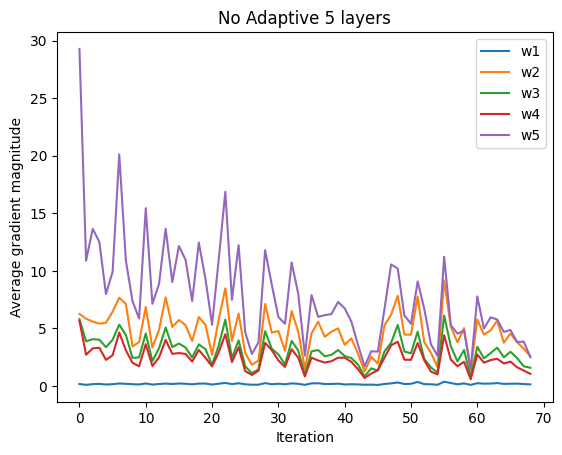

In [55]:
ax = plt.subplot(1,1,1)
plt.plot(abs(nn_better5NoAdaptive.grad_w1_[1:]), label='w1')
plt.plot(abs(nn_better5NoAdaptive.grad_w2_[1:]), label='w2')
plt.plot(abs(nn_better5NoAdaptive.grad_w3_[1:]), label='w3')
plt.plot(abs(nn_better5NoAdaptive.grad_w4_[1:]), label='w4')
plt.plot(abs(nn_better5NoAdaptive.grad_w5_[1:]), label='w5')
plt.legend()
plt.ylabel('Average gradient magnitude')
plt.xlabel('Iteration')
plt.title('No Adaptive 5 layers')
plt.show()

In [56]:
# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka

# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
import numpy as np
from scipy.special import expit
import pandas as pd
import sys

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class FiveLayerPerceptron2(FiveLayerPerceptron):
    def __init__(self, epsilon = 1e-8, gamma = 0.9, **kwds): 
        self.epsilon = epsilon
        self.gamma = gamma
        # but keep other keywords
        super().__init__(**kwds)
        

    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4, self.W5 , self.b1, self.b2, self.b3, self.b4, self.b5 = self._initialize_weights()

        #rho_W1_prev = np.zeros(self.W1.shape)
        #rho_W2_prev = np.zeros(self.W2.shape)
        #rho_W3_prev = np.zeros(self.W3.shape)
        #rho_W4_prev = np.zeros(self.W4.shape)
        #rho_W5_prev = np.zeros(self.W5.shape)
        #rho_b1_prev = np.zeros(self.b1.shape)
        #rho_b2_prev = np.zeros(self.b2.shape)
        #rho_b3_prev = np.zeros(self.b3.shape)
        #rho_b4_prev = np.zeros(self.b4.shape)
        #rho_b5_prev = np.zeros(self.b5.shape)

        M1, Mb1 = np.zeros(self.W1.shape), np.zeros(self.b1.shape)
        M2, Mb2 = np.zeros(self.W2.shape), np.zeros(self.b2.shape)
        M3, Mb3 = np.zeros(self.W3.shape), np.zeros(self.b3.shape)
        M4, Mb4 = np.zeros(self.W4.shape), np.zeros(self.b4.shape)
        M5, Mb5 = np.zeros(self.W5.shape), np.zeros(self.b5.shape)
        
        V1, Vb1 = np.zeros(self.W1.shape), np.zeros(self.b1.shape)
        V2, Vb2 = np.zeros(self.W2.shape), np.zeros(self.b2.shape)
        V3, Vb3 = np.zeros(self.W3.shape), np.zeros(self.b3.shape)
        V4, Vb4 = np.zeros(self.W4.shape), np.zeros(self.b4.shape)
        V5, Vb5 = np.zeros(self.W5.shape), np.zeros(self.b5.shape)
        
        self.grad_w1_ = np.zeros(self.epochs)
        self.grad_w2_ = np.zeros(self.epochs)
        self.grad_w3_ = np.zeros(self.epochs)
        self.grad_w4_ = np.zeros(self.epochs)
        self.grad_w5_ = np.zeros(self.epochs)
        self.grad_b1_ = np.zeros(self.epochs)
        self.grad_b2_ = np.zeros(self.epochs)
        self.grad_b3_ = np.zeros(self.epochs)
        self.grad_b4_ = np.zeros(self.epochs)
        self.grad_b5_ = np.zeros(self.epochs)
        self.cost_ = []

        for i in range(self.epochs):

            # adaptive learning rate
            # \frac{\eta}{1+\epsilon\cdot k}
            eta = self.eta ** (1 + self.decrease_const*i)
            eta = max(eta, self.eta/1000)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                ridx = np.random.permutation(y_data.shape[0])
                X_data, Y_enc = X_data[ridx], Y_enc[:,ridx]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2,
                                                       self.W3,
                                                       self.W4,
                                                       self.W5,
                                                       self.b1,
                                                       self.b2,
                                                       self.b3,
                                                       self.b4,
                                                       self.b5
                                                              )
                
                cost = self._cost(A6,Y_enc[:, idx],self.W1,self.W2,self.W3,self.W4,self.W5)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2, grad3, grad4, grad5, gradb1, gradb2, gradb3, gradb4, gradb5 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4,A5=A5,A6=A6, Z1=Z1, Z2=Z2, Z3=Z3,Z4=Z4,Z5=Z5,
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1,W2=self.W2,W3=self.W3,W4=self.W4,W5=self.W5)
                
                # attempting AdaDelta adaptive learning technique
                
                G1, G2, G3, G4, G5 = grad1*grad1, grad2*grad2, grad3*grad3, grad4*grad4, grad5*grad5
                Gb1, Gb2, Gb3, Gb4, Gb5 = gradb1*gradb1, gradb2*gradb2, gradb3*gradb3, gradb4*gradb4, gradb5*gradb5
                
                V1 = self.gamma*V1 + (1 - self.gamma)*G1
                V2 = self.gamma*V2 + (1 - self.gamma)*G2
                V3 = self.gamma*V3 + (1 - self.gamma)*G3
                V4 = self.gamma*V4 + (1 - self.gamma)*G4
                V5 = self.gamma*V5 + (1 - self.gamma)*G5
                Vb1 = self.gamma*Vb1 + (1 - self.gamma)*Gb1
                Vb2 = self.gamma*Vb2 + (1 - self.gamma)*Gb2
                Vb3 = self.gamma*Vb3 + (1 - self.gamma)*Gb3
                Vb4 = self.gamma*Vb4 + (1 - self.gamma)*Gb4
                Vb5 = self.gamma*Vb5 + (1 - self.gamma)*Gb5
                
                M1 = self.gamma*M1 + (1 - self.gamma)*grad1
                M2 = self.gamma*M2 + (1 - self.gamma)*grad2
                M3 = self.gamma*M3 + (1 - self.gamma)*grad3
                M4 = self.gamma*M4 + (1 - self.gamma)*grad4
                M5 = self.gamma*M5 + (1 - self.gamma)*grad5
                Mb1 = self.gamma*Mb1 + (1 - self.gamma)*gradb1
                Mb2 = self.gamma*Mb2 + (1 - self.gamma)*gradb2
                Mb3 = self.gamma*Mb3 + (1 - self.gamma)*gradb3
                Mb4 = self.gamma*Mb4 + (1 - self.gamma)*gradb4
                Mb5 = self.gamma*Mb5 + (1 - self.gamma)*gradb5
                
                rho_W1 = M1/np.sqrt(V1+self.epsilon)
                rho_W2 = M2/np.sqrt(V2+self.epsilon)
                rho_W3 = M3/np.sqrt(V3+self.epsilon)
                rho_W4 = M4/np.sqrt(V4+self.epsilon)
                rho_W5 = M5/np.sqrt(V5+self.epsilon)
                rho_b1 = Mb1/np.sqrt(Vb1+self.epsilon)
                rho_b2 = Mb2/np.sqrt(Vb2+self.epsilon)
                rho_b3 = Mb3/np.sqrt(Vb3+self.epsilon)
                rho_b4 = Mb4/np.sqrt(Vb4+self.epsilon)
                rho_b5 = Mb5/np.sqrt(Vb5+self.epsilon)

                # momentum calculations
                #rho_W1, rho_W2, rho_W3, rho_W4, rho_W5 = eta * grad1, eta * grad2, eta * grad3, eta * grad4, eta * grad5
                #rho_b1, rho_b2, rho_b3, rho_b4, rho_b5 = eta * gradb1, eta * gradb2, eta * gradb3, eta * gradb4, eta * gradb5
                self.W1 -= (eta * rho_W1)
                self.W2 -= (eta * rho_W2)
                self.W3 -= (eta * rho_W3)
                self.W4 -= (eta * rho_W4)
                self.W5 -= (eta * rho_W5)
                self.b1 -= (eta * rho_b1)
                self.b2 -= (eta * rho_b2)
                self.b3 -= (eta * rho_b3)
                self.b4 -= (eta * rho_b4)
                self.b5 -= (eta * rho_b5)
                #rho_W1_prev, rho_W2_prev, rho_W3_prev , rho_W4_prev, rho_W5_prev = rho_W1, rho_W2, rho_W3, rho_W4, rho_W5
                #rho_b1_prev, rho_b2_prev,rho_b3_prev,rho_b4_prev,rho_b5_prev = rho_b1, rho_b2, rho_b3, rho_b4, rho_b5
                
            self.cost_.append(mini_cost)

            self.grad_w1_[i] = np.mean(np.abs(grad1))
            self.grad_w2_[i] = np.mean(np.abs(grad2))
            self.grad_w3_[i] = np.mean(np.abs(grad3))
            self.grad_w4_[i] = np.mean(np.abs(grad4))
            self.grad_w5_[i] = np.mean(np.abs(grad5))
            self.grad_b1_[i]=np.mean(np.abs(gradb1))
            self.grad_b2_[i]=np.mean(np.abs(gradb2))
            self.grad_b3_[i]=np.mean(np.abs(gradb3))
            self.grad_b4_[i]=np.mean(np.abs(gradb4))
            self.grad_b5_[i]=np.mean(np.abs(gradb5))
        
        return self


In [57]:
vals = { 'n_hidden':50, 
         'C':0.1, 'epochs':70, 'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}

nn_better5AdaDelta = FiveLayerPerceptron2(**vals)

nn_better5AdaDelta.fit(X_train4.to_numpy(), y_train4.to_numpy(), print_progress=1)

Epoch: 70/70

In [71]:
yhatA5ad = nn_better5AdaDelta.predict(X_test4.to_numpy())
print('Test Accuracy:',accuracy_score(y_test4.to_numpy(),yhatA5ad))

Test Accuracy: 0.5233773377337734


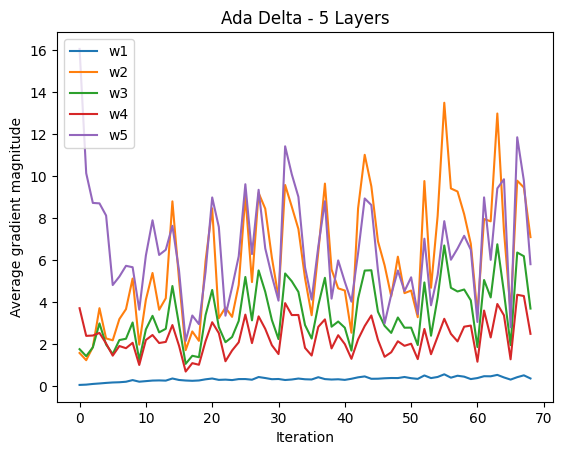

In [59]:
ax = plt.subplot(1,1,1)
plt.plot(abs(nn_better5AdaDelta.grad_w1_[1:]), label='w1')
plt.plot(abs(nn_better5AdaDelta.grad_w2_[1:]), label='w2')
plt.plot(abs(nn_better5AdaDelta.grad_w3_[1:]), label='w3')
plt.plot(abs(nn_better5AdaDelta.grad_w4_[1:]), label='w4')
plt.plot(abs(nn_better5AdaDelta.grad_w5_[1:]), label='w5')
plt.legend()
plt.ylabel('Average gradient magnitude')
plt.xlabel('Iteration')
plt.title('Ada Delta - 5 Layers')
plt.show()

In [60]:
acc_ad1 = accuracy_score(y_test4.to_numpy(),yhatM5)
acc_no = accuracy_score(y_test4.to_numpy(),yhatA5)
acc_ad2 = accuracy_score(y_test4.to_numpy(), yhatA5ad)

e1 = 1 - acc_ad1
e2 = 1 - acc_no
e3 = 1 - acc_ad2

z_stat = 1.96 #95% CI

# e1 and e2
d12 = e1 - e2
var12 = (e1*(1 - e1) + e2*(1 - e2))/len(y_test4)
print('Model 1 vs. Model 2 CI:', d12 - z_stat*np.sqrt(var12), d12 + z_stat*np.sqrt(var12))

# e1 and e3
d13 = e1 - e3
var13 = (e1*(1 - e1) + e3*(1 - e3))/len(y_test4)
print('Model 1 vs. Model 3 CI:', d13 - z_stat*np.sqrt(var13), d13 + z_stat*np.sqrt(var13))

# e2 and e3
d23 = e2 - e3
var23 = (e2*(1 - e2) + e3*(1 - e3))/len(y_test4)
print('Model 2 vs. Model 3 CI:', d23 - z_stat*np.sqrt(var23), d23 + z_stat*np.sqrt(var23))

Model 1 vs. Model 2 CI: 0.0206472178492865 0.04329667654015254
Model 1 vs. Model 3 CI: -0.055575185733990756 -0.03270864264884746
Model 2 vs. Model 3 CI: -0.08748528620206301 -0.06474243657021424


While the initial adaptive learning technique worked fairly well, it turns out that utilizing no adaptive learning technique is actually best for getting accurate predictions on this dataset (with respect to the Five Layer Perceptrons being considered). The above 95% confidence intervals indicate that no adaptive learning was better than our original adaptive learning and AdaDelta, while the original adaptive learning technique also beat out AdaDelta. 

## 4. Exceptional Work (1 points total)

+ One idea (required for 7000 level students):  Implement adaptive momentum (AdaM) in the five layer neural network and quantify the performance. 

In [61]:
# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka

# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
import numpy as np
from scipy.special import expit
import pandas as pd
import sys

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class FiveLayerPerceptron3(FiveLayerPerceptron):
    def __init__(self, epsilon = 1e-8, beta1 = 0.9, beta2 = 0.999, **kwds): 
        self.epsilon = epsilon
        self.beta1 = beta1
        self.beta2 = beta2
        # but keep other keywords
        super().__init__(**kwds)
        

    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4, self.W5 , self.b1, self.b2, self.b3, self.b4, self.b5 = self._initialize_weights()

        #rho_W1_prev = np.zeros(self.W1.shape)
        #rho_W2_prev = np.zeros(self.W2.shape)
        #rho_W3_prev = np.zeros(self.W3.shape)
        #rho_W4_prev = np.zeros(self.W4.shape)
        #rho_W5_prev = np.zeros(self.W5.shape)
        #rho_b1_prev = np.zeros(self.b1.shape)
        #rho_b2_prev = np.zeros(self.b2.shape)
        #rho_b3_prev = np.zeros(self.b3.shape)
        #rho_b4_prev = np.zeros(self.b4.shape)
        #rho_b5_prev = np.zeros(self.b5.shape)

        M1, Mb1 = np.zeros(self.W1.shape), np.zeros(self.b1.shape)
        M2, Mb2 = np.zeros(self.W2.shape), np.zeros(self.b2.shape)
        M3, Mb3 = np.zeros(self.W3.shape), np.zeros(self.b3.shape)
        M4, Mb4 = np.zeros(self.W4.shape), np.zeros(self.b4.shape)
        M5, Mb5 = np.zeros(self.W5.shape), np.zeros(self.b5.shape)
        
        V1, Vb1 = np.zeros(self.W1.shape), np.zeros(self.b1.shape)
        V2, Vb2 = np.zeros(self.W2.shape), np.zeros(self.b2.shape)
        V3, Vb3 = np.zeros(self.W3.shape), np.zeros(self.b3.shape)
        V4, Vb4 = np.zeros(self.W4.shape), np.zeros(self.b4.shape)
        V5, Vb5 = np.zeros(self.W5.shape), np.zeros(self.b5.shape)
        
        self.grad_w1_ = np.zeros(self.epochs)
        self.grad_w2_ = np.zeros(self.epochs)
        self.grad_w3_ = np.zeros(self.epochs)
        self.grad_w4_ = np.zeros(self.epochs)
        self.grad_w5_ = np.zeros(self.epochs)
        self.grad_b1_ = np.zeros(self.epochs)
        self.grad_b2_ = np.zeros(self.epochs)
        self.grad_b3_ = np.zeros(self.epochs)
        self.grad_b4_ = np.zeros(self.epochs)
        self.grad_b5_ = np.zeros(self.epochs)
        self.cost_ = []

        for i in range(self.epochs):

            # adaptive learning rate
            # \frac{\eta}{1+\epsilon\cdot k}
            eta = self.eta ** (1 + self.decrease_const*i)
            eta = max(eta, self.eta/1000)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                ridx = np.random.permutation(y_data.shape[0])
                X_data, Y_enc = X_data[ridx], Y_enc[:,ridx]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2,
                                                       self.W3,
                                                       self.W4,
                                                       self.W5,
                                                       self.b1,
                                                       self.b2,
                                                       self.b3,
                                                       self.b4,
                                                       self.b5
                                                              )
                
                cost = self._cost(A6,Y_enc[:, idx],self.W1,self.W2,self.W3,self.W4,self.W5)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2, grad3, grad4, grad5, gradb1, gradb2, gradb3, gradb4, gradb5 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4,A5=A5,A6=A6, Z1=Z1, Z2=Z2, Z3=Z3,Z4=Z4,Z5=Z5,
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1,W2=self.W2,W3=self.W3,W4=self.W4,W5=self.W5)
                
                # attempting AdaDelta adaptive learning technique
                
                G1, G2, G3, G4, G5 = grad1*grad1, grad2*grad2, grad3*grad3, grad4*grad4, grad5*grad5
                Gb1, Gb2, Gb3, Gb4, Gb5 = gradb1*gradb1, gradb2*gradb2, gradb3*gradb3, gradb4*gradb4, gradb5*gradb5
                
                V1 = self.beta2*V1 + (1 - self.beta2)*G1
                V2 = self.beta2*V2 + (1 - self.beta2)*G2
                V3 = self.beta2*V3 + (1 - self.beta2)*G3
                V4 = self.beta2*V4 + (1 - self.beta2)*G4
                V5 = self.beta2*V5 + (1 - self.beta2)*G5
                Vb1 = self.beta2*Vb1 + (1 - self.beta2)*Gb1
                Vb2 = self.beta2*Vb2 + (1 - self.beta2)*Gb2
                Vb3 = self.beta2*Vb3 + (1 - self.beta2)*Gb3
                Vb4 = self.beta2*Vb4 + (1 - self.beta2)*Gb4
                Vb5 = self.beta2*Vb5 + (1 - self.beta2)*Gb5
                
                M1 = self.beta1*M1 + (1 - self.beta1)*grad1
                M2 = self.beta1*M2 + (1 - self.beta1)*grad2
                M3 = self.beta1*M3 + (1 - self.beta1)*grad3
                M4 = self.beta1*M4 + (1 - self.beta1)*grad4
                M5 = self.beta1*M5 + (1 - self.beta1)*grad5
                Mb1 = self.beta1*Mb1 + (1 - self.beta1)*gradb1
                Mb2 = self.beta1*Mb2 + (1 - self.beta1)*gradb2
                Mb3 = self.beta1*Mb3 + (1 - self.beta1)*gradb3
                Mb4 = self.beta1*Mb4 + (1 - self.beta1)*gradb4
                Mb5 = self.beta1*Mb5 + (1 - self.beta1)*gradb5
                
                m1_hat = M1/(1-np.power(self.beta1, i+1)) 
                m2_hat = M2/(1-np.power(self.beta1, i+1)) 
                m3_hat = M3/(1-np.power(self.beta1, i+1)) 
                m4_hat = M4/(1-np.power(self.beta1, i+1)) 
                m5_hat = M5/(1-np.power(self.beta1, i+1)) 
                mb1_hat = Mb1/(1-np.power(self.beta1, i+1)) 
                mb2_hat = Mb2/(1-np.power(self.beta1, i+1)) 
                mb3_hat = Mb3/(1-np.power(self.beta1, i+1)) 
                mb4_hat = Mb4/(1-np.power(self.beta1, i+1)) 
                mb5_hat = Mb5/(1-np.power(self.beta1, i+1)) 
                
                v1_hat = V1/(1-np.power(self.beta2, i+1)) 
                v2_hat = V2/(1-np.power(self.beta2, i+1)) 
                v3_hat = V3/(1-np.power(self.beta2, i+1)) 
                v4_hat = V4/(1-np.power(self.beta2, i+1)) 
                v5_hat = V5/(1-np.power(self.beta2, i+1)) 
                vb1_hat = Vb1/(1-np.power(self.beta2, i+1)) 
                vb2_hat = Vb2/(1-np.power(self.beta2, i+1)) 
                vb3_hat = Vb3/(1-np.power(self.beta2, i+1)) 
                vb4_hat = Vb4/(1-np.power(self.beta2, i+1)) 
                vb5_hat = Vb5/(1-np.power(self.beta2, i+1)) 
                
                rho_W1 = m1_hat/np.sqrt(v1_hat+self.epsilon)
                rho_W2 = m2_hat/np.sqrt(v2_hat+self.epsilon)
                rho_W3 = m3_hat/np.sqrt(v3_hat+self.epsilon)
                rho_W4 = m4_hat/np.sqrt(v4_hat+self.epsilon)
                rho_W5 = m5_hat/np.sqrt(v5_hat+self.epsilon)
                rho_b1 = mb1_hat/np.sqrt(vb1_hat+self.epsilon)
                rho_b2 = mb2_hat/np.sqrt(vb2_hat+self.epsilon)
                rho_b3 = mb3_hat/np.sqrt(vb3_hat+self.epsilon)
                rho_b4 = mb4_hat/np.sqrt(vb4_hat+self.epsilon)
                rho_b5 = mb5_hat/np.sqrt(vb5_hat+self.epsilon)

                # momentum calculations
                #rho_W1, rho_W2, rho_W3, rho_W4, rho_W5 = eta * grad1, eta * grad2, eta * grad3, eta * grad4, eta * grad5
                #rho_b1, rho_b2, rho_b3, rho_b4, rho_b5 = eta * gradb1, eta * gradb2, eta * gradb3, eta * gradb4, eta * gradb5
                self.W1 -= (eta * rho_W1)
                self.W2 -= (eta * rho_W2)
                self.W3 -= (eta * rho_W3)
                self.W4 -= (eta * rho_W4)
                self.W5 -= (eta * rho_W5)
                self.b1 -= (eta * rho_b1)
                self.b2 -= (eta * rho_b2)
                self.b3 -= (eta * rho_b3)
                self.b4 -= (eta * rho_b4)
                self.b5 -= (eta * rho_b5)
                #rho_W1_prev, rho_W2_prev, rho_W3_prev , rho_W4_prev, rho_W5_prev = rho_W1, rho_W2, rho_W3, rho_W4, rho_W5
                #rho_b1_prev, rho_b2_prev,rho_b3_prev,rho_b4_prev,rho_b5_prev = rho_b1, rho_b2, rho_b3, rho_b4, rho_b5
                
            self.cost_.append(mini_cost)

            self.grad_w1_[i] = np.mean(np.abs(grad1))
            self.grad_w2_[i] = np.mean(np.abs(grad2))
            self.grad_w3_[i] = np.mean(np.abs(grad3))
            self.grad_w4_[i] = np.mean(np.abs(grad4))
            self.grad_w5_[i] = np.mean(np.abs(grad5))
            self.grad_b1_[i]=np.mean(np.abs(gradb1))
            self.grad_b2_[i]=np.mean(np.abs(gradb2))
            self.grad_b3_[i]=np.mean(np.abs(gradb3))
            self.grad_b4_[i]=np.mean(np.abs(gradb4))
            self.grad_b5_[i]=np.mean(np.abs(gradb5))
        
        return self


In [62]:
vals = { 'n_hidden':50, 
         'C':0.1, 'epochs':70, 'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}

nn_better5AdaM = FiveLayerPerceptron3(**vals)

nn_better5AdaM.fit(X_train4.to_numpy(), y_train4.to_numpy(), print_progress=1)

Epoch: 70/70

In [63]:
yhatA5adam = nn_better5AdaM.predict(X_test4.to_numpy())
print('Test Accuracy:',accuracy_score(y_test4.to_numpy(),yhatA5adam))

Test acc: 0.5237898789878987


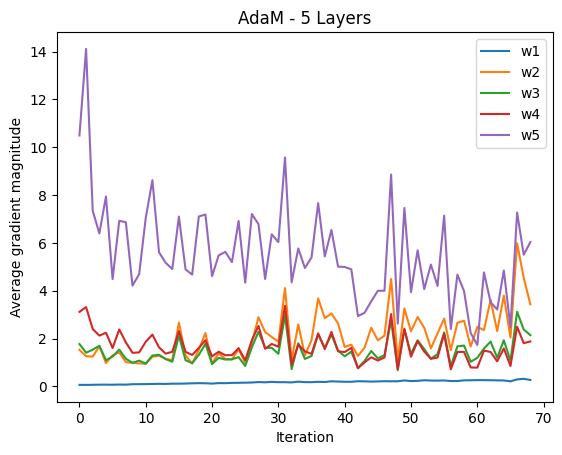

In [78]:
ax = plt.subplot(1,1,1)
plt.plot(abs(nn_better5AdaM.grad_w1_[1:]), label='w1')
plt.plot(abs(nn_better5AdaM.grad_w2_[1:]), label='w2')
plt.plot(abs(nn_better5AdaM.grad_w3_[1:]), label='w3')
plt.plot(abs(nn_better5AdaM.grad_w4_[1:]), label='w4')
plt.plot(abs(nn_better5AdaM.grad_w5_[1:]), label='w5')
plt.legend()
plt.ylabel('Average gradient magnitude')
plt.xlabel('Iteration')
plt.title('AdaM - 5 Layers')
plt.show()

In [77]:
acc_ad1 = accuracy_score(y_test4.to_numpy(),yhatM5)
acc_no = accuracy_score(y_test4.to_numpy(),yhatA5)
acc_ad2 = accuracy_score(y_test4.to_numpy(), yhatA5ad)
acc_ad3 = accuracy_score(y_test4.to_numpy(), yhatA5adam)

e1 = 1 - acc_ad1
e2 = 1 - acc_no
e3 = 1 - acc_ad2
e4 = 1 - acc_ad3

z_stat = 1.96 #95% CI

# e1 and e2
d12 = e1 - e2
var12 = (e1*(1 - e1) + e2*(1 - e2))/len(y_test4)
print('Model 1 vs. Model 2 CI:', d12 - z_stat*np.sqrt(var12), d12 + z_stat*np.sqrt(var12))

# e1 and e3
d13 = e1 - e3
var13 = (e1*(1 - e1) + e3*(1 - e3))/len(y_test4)
print('Model 1 vs. Model 3 CI:', d13 - z_stat*np.sqrt(var13), d13 + z_stat*np.sqrt(var13))

# e1 and e4
d14 = e1 - e4
var14 = (e1*(1 - e1) + e4*(1 - e4))/len(y_test4)
print('Model 1 vs. Model 4 CI:', d14 - z_stat*np.sqrt(var14), d14 + z_stat*np.sqrt(var14))

# e2 and e3
d23 = e2 - e3
var23 = (e2*(1 - e2) + e3*(1 - e3))/len(y_test4)
print('Model 2 vs. Model 3 CI:', d23 - z_stat*np.sqrt(var23), d23 + z_stat*np.sqrt(var23))

# e2 and e4
d24 = e2 - e4
var24 = (e2*(1 - e2) + e4*(1 - e4))/len(y_test4)
print('Model 2 vs. Model 4 CI:', d24 - z_stat*np.sqrt(var24), d24 + z_stat*np.sqrt(var24))

# e3 and e4
d34 = e3 - e4
var34 = (e3*(1 - e3) + e4*(1 - e4))/len(y_test4)
print('Model 3 vs. Model 4 CI:', d34 - z_stat*np.sqrt(var34), d34 + z_stat*np.sqrt(var34))

Model 1 vs. Model 2 CI: 0.0206472178492865 0.04329667654015254
Model 1 vs. Model 3 CI: -0.055575185733990756 -0.03270864264884746
Model 1 vs. Model 4 CI: -0.055162419709181836 -0.03229632616540563
Model 2 vs. Model 3 CI: -0.08748528620206301 -0.06474243657021424
Model 2 vs. Model 4 CI: -0.0870725189547506 -0.0643301213092759
Model 3 vs. Model 4 CI: -0.011066760383391184 0.011891842891641935


The AdaM learning technique did just slightly better than the AdaDelta, but still worse than the original adaptive learning and applying no adaptive learning. In fact, the 95% CI for the difference between the 5LP with AdaDelta and the 5LP with AdaM includes 0, indicating no significant difference in performance between the two techniques in this case. It turns out that the best Five Layer Perceptron is actually `FiveLPNoAdaptive()`, which utilizes no adaptive learning techniques and gives us the highest accuracy for the Five Layer Perceptron of **59.95%**. The Four Layer Perceptron actually gave us the highest model accuracy seen in this notebook of **63.28%**.

#### Sources

\[1] [United States Census Bureau: Income and Poverty in the United States: 2018](https://www.census.gov/library/publications/2019/demo/p60-266.html#:~:text=In%202018%2C%20there%20were%2038.1,17.4%20percent%20to%2016.2%20percent.)